In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
# Data Preprocessing
df = pd.read_csv('Social_Network_Ads.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [3]:
# Training SVM
from sklearn.svm import SVC

# Training dilakukan secara otomatis oleh kelas SVC dan method SVC.fit()
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(x_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(x_test)

# Evaluating Predictions
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(f"Accuracy Score : {accuracy_score(y_test,classifier.predict(x_test))}")

[[64  4]
 [ 3 29]]
Accuracy Score : 0.93


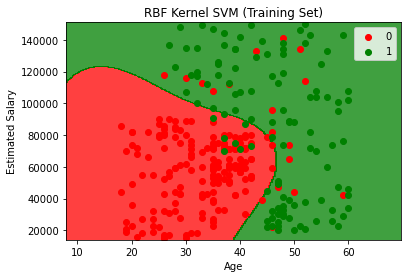

In [4]:
# Visualizing Training Set
from matplotlib.colors import ListedColormap
x_set, y_set = sc.inverse_transform(x_train), y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 10, stop=x_set[:, 0].max() + 10, step=0.25),
                        np.arange(start=x_set[:, 1].min() - 1000, stop=x_set[:, 1].max() + 1000, step=25))
plt.contourf(x1, x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
                alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                color=ListedColormap(('red', 'green'))(i), label=j)
plt.title('RBF Kernel SVM (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

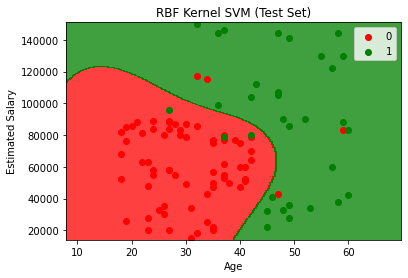

In [5]:
# Visualizing Test Set
from matplotlib.colors import ListedColormap
x_set, y_set = sc.inverse_transform(x_test), y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 10, stop=x_set[:, 0].max() + 10, step=0.25),
                        np.arange(start=x_set[:, 1].min() - 1000, stop=x_set[:, 1].max() + 1000, step=25))
plt.contourf(x1, x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
                alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                color=ListedColormap(('red', 'green'))(i), label=j)
plt.title('RBF Kernel SVM (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()